In [2]:
# https://www.ohmsha.co.jp/book/9784274226984/
# graph
%config IPCompleter.greedy=True
import sys
import numpy as np
import scipy as sp
import scipy.stats
import sympy as symp
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

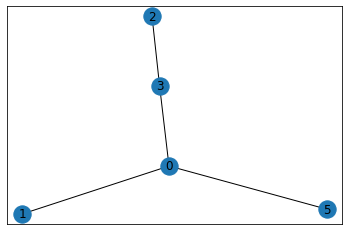

In [3]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([(0,1), (0,3), (0,5), (2,3)])

#pos = nx.circular_layout(G)
pos = nx.spring_layout(G)
#pos = nx.kamada_kawai_layout(G)

nx.draw_networkx(G, pos)

In [4]:
nx.adj_matrix(G).todense()

matrix([[0, 1, 1, 1, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0]], dtype=int32)

In [5]:
length = dict(nx.shortest_path(G))
length[0][2]

[0, 3, 2]

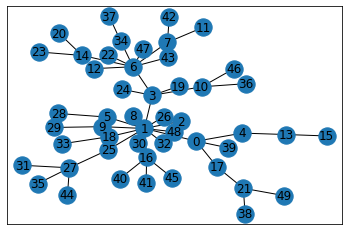

In [15]:
# エッジを多く持つノードに対して高い確率でノードを追加してネットワークを構成する
ScaleFreeNetwork = nx.barabasi_albert_graph(n=50, m=1)
nx.draw_networkx(ScaleFreeNetwork, nx.kamada_kawai_layout(ScaleFreeNetwork))

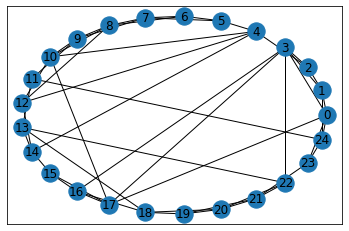

In [89]:
# 隣＆隣の隣とのエッジを持つ（次数＝４）ネットワークを作り、一定の確率でランダムに繋ぎ変える
# > pが大きくなるにつれてクラスタ性はそのままに、距離だけが小さくなっている...近い者同士が繋がっているという規則正しい...性質がそのままで、ノード間の平均距離が小さくなっているということに相当する
SmallWorldNetwork = nx.watts_strogatz_graph(n=25, k=4, p=0.3, seed=0)
nx.draw_networkx(SmallWorldNetwork, nx.circular_layout(SmallWorldNetwork))

In [92]:
def fun(f):
    G = nx.watts_strogatz_graph(n=75, k=4, p=f, seed=0)
    l = nx.average_shortest_path_length(G) # ノード間の平均距離
    c = nx.average_clustering(G) # 平均クラスタ係数
    return [l, c]
xx = np.arange(0.00, 0.25, 0.01)
plot = np.array([fun(f) for f in xx])

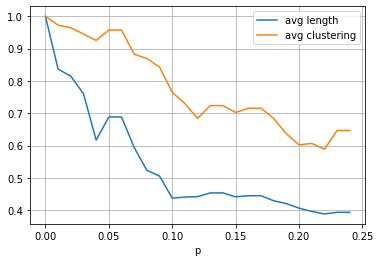

In [93]:
# pの増加につれて、近い者同士が繋がっているという性質を保ちながらも、平均距離は小さくなっていく
plt.plot(xx, plot[:, 0] / plot[0, 0], label="avg length")
plt.plot(xx, plot[:, 1] / plot[0, 1], label="avg clustering")
plt.xlabel("p")
plt.grid(True)
plt.legend()